This notebook shows how to execute SQL queries and apply EDA (Exploratory data analysis) to visualize BigQuery public data.

*Reference:* <br>
*Visualizing BigQuery data in a Jupyter notebook https://cloud.google.com/bigquery/docs/visualize-jupyter#conda*

## 1) Connect BigQuery

In [8]:
# install BigQuery packages
# !pip install google-cloud 
# !pip install --upgrade google-cloud-bigquery[pandas] 
# !pip install google-cloud-storage

In [1]:
# magic command, execute with minimal code 
%load_ext google.cloud.bigquery

In [2]:
# read private ekey
json_file_name = "../credential/selfpractice-350914-57125c5d1aec.json"

In [3]:
# use BigQuery client library to analyze BigQuery data
from google.cloud import bigquery

client = bigquery.Client.from_service_account_json(json_file_name)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# transfers results to pandas dataframe
def sql_to_df(query):
    return(client.query(query).result().to_dataframe())

We will check out the **world_bank_health_population** dataset, see if we find something interesting. <br>

### Overview:
This dataset combines key health statistics from a variety of sources to provide a look at global health and population trends. It includes information on nutrition, reproductive health, education, immunization, and diseases from over 200 countries.

There are total 5 tables in this dataset: <br>
1. country_series_definitions
2. country_summary
3. health_nutrition_population
4. series_summary
5. series_times

Let's check the fields of the datasets

In [6]:
data = "bigquery-public-data.world_bank_health_population.country_series_definitions"
client.get_table(data).schema

[SchemaField('country_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('series_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('description', 'STRING', 'NULLABLE', None, (), None)]

In [7]:
data = "bigquery-public-data.world_bank_health_population.country_summary"
client.get_table(data).schema

[SchemaField('country_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('short_name', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('table_name', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('long_name', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('two_alpha_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('currency_unit', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('special_notes', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('region', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('income_group', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('wb_2_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('national_accounts_base_year', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('national_accounts_reference_year', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('sna_price_valuation', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('lending_category', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('

In [8]:
data = "bigquery-public-data.world_bank_health_population.health_nutrition_population"
client.get_table(data).schema

[SchemaField('country_name', 'STRING', 'NULLABLE', '', (), None),
 SchemaField('country_code', 'STRING', 'NULLABLE', '', (), None),
 SchemaField('indicator_name', 'STRING', 'NULLABLE', '', (), None),
 SchemaField('indicator_code', 'STRING', 'NULLABLE', '', (), None),
 SchemaField('value', 'FLOAT', 'NULLABLE', '', (), None),
 SchemaField('year', 'INTEGER', 'NULLABLE', '', (), None)]

In [9]:
data = "bigquery-public-data.world_bank_health_population.series_summary"
client.get_table(data).schema

[SchemaField('series_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('topic', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('indicator_name', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('short_definition', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('long_definition', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('unit_of_measure', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('periodicity', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('base_period', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('other_notes', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('aggregation_method', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('limitations_and_exceptions', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('notes_from_original_source', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('general_comments', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('source', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('

In [10]:
data = "bigquery-public-data.world_bank_health_population.series_times"
client.get_table(data).schema

[SchemaField('series_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('year', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('description', 'STRING', 'NULLABLE', None, (), None)]

## 2) SQL Queries

### 2a) Let's figure out some basic information first

In [11]:
# How many countries are being recorded

sql='''
    select count(distinct country_name) as country_count
    from `bigquery-public-data.world_bank_health_population.health_nutrition_population`
'''

sql_to_df(sql)

,country_count
0,261


In [12]:
# First, Last year of dataset

sql='''
    select min(year) as first_year, max(year) as last_year
    from `bigquery-public-data.world_bank_health_population.health_nutrition_population`
'''

sql_to_df(sql)

,first_year,last_year
0,1960,2020


In [13]:
# What are the types of data

sql='''
    select topic, count(*) as Number_of_Indicator
    from `bigquery-public-data.world_bank_health_population.series_summary`
    group by topic
    order by Number_of_Indicator desc
'''

sql_to_df(sql)

,topic,Number_of_Indicator
0,Population dynamics: Population by age group,138
1,Nutrition,30
2,Health financing,30
3,Population dynamics: Other demographic indicators,28
4,HIV/AIDS,27
5,Background: Education,25
6,Reproductive health,24
7,None,24
8,Population dynamics: Other demographic Indicators,21
9,Water and sanitation,18


In [14]:
# What are the data available for Hong Kong SAR

sql='''
    select topic, count(distinct series.series_code) as number_of_indicator, count(*) as number_of_record, min(year) as first_year, max(year) as latest_year
    from `bigquery-public-data.world_bank_health_population.series_summary` series
    inner join
        `bigquery-public-data.world_bank_health_population.health_nutrition_population` table 
    on 
        series.series_code = table.indicator_code
    where table.country_name = "Hong Kong SAR, China"
    group by topic
    order by number_of_record desc
'''

sql_to_df(sql)

,topic,number_of_indicator,number_of_record,first_year,latest_year
0,Population dynamics: Population by age group,138,8418,1960,2020
1,Population dynamics: Other demographic Indicators,20,1094,1960,2020
2,Background: Education,18,527,1971,2020
3,Population dynamics: Population,5,305,1960,2020
4,Water and sanitation,10,210,2000,2020
5,Background: Labor force,6,172,1990,2020
6,Population dynamics,2,120,1960,2019
7,Reproductive health,7,105,1960,2019
8,Infectious diseases,4,78,2000,2019
9,Background: Economy,1,58,1963,2020


There are 13 topics available for HK. Let's simulate some questions and find out the answer using sql queries!

### 2b) Explore some interesting questions

<font size = "4"> Q1) <ins>What’re the average age of first marriages for HK male and female? What's the trend?</ins></font>

In [15]:
# Q1)

sql='''
    select * 
    from(
        select year, avg(case when indicator_code = "SP.DYN.SMAM.FE" then value end) as female_first_marriage_age, avg(case when indicator_code = "SP.DYN.SMAM.MA" then value end) as male_first_marriage_age
        from `bigquery-public-data.world_bank_health_population.health_nutrition_population`
        where country_name = "Hong Kong SAR, China" 
        group by year
        order by year
    )
    where female_first_marriage_age is not null or male_first_marriage_age is not null
'''

hkFirstMarriageAge = sql_to_df(sql)
hkFirstMarriageAge

,year,female_first_marriage_age,male_first_marriage_age
0,1971,23.8,30.2
1,1981,25.3,28.7
2,1986,26.6,29.2
3,1991,27.7,1.0
4,1996,28.6,30.7
5,2001,29.5,31.6
6,2006,30.3,32.8
7,2011,30.3,32.7
8,2016,29.9,32.1


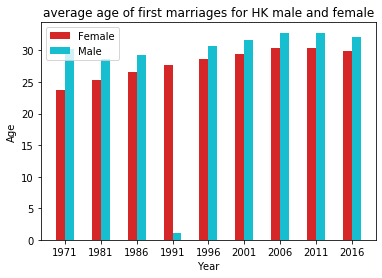

In [17]:
# cluster bar chart

fig, ax = plt.subplots()
x = np.arange(len(hkFirstMarriageAge["year"]))
bar_width = 0.25

ax.bar(x - bar_width/2, hkFirstMarriageAge["female_first_marriage_age"], bar_width, label="Female", color = "tab:red")
ax.bar(x + bar_width/2, hkFirstMarriageAge["male_first_marriage_age"], bar_width, label="Male", color = "tab:cyan")

ax.set_xlabel("Year")
ax.set_ylabel("Age")
ax.set_title("average age of first marriages for HK male and female")
ax.set_xticks(x)
ax.set_xticklabels(hkFirstMarriageAge["year"])
ax.legend()

plt.show()

### Conclusion:
It seems the male data in 1991 is not correct, but it doesn't affect the our observation for the trend.

1. Apparently, both female and male in HK are getting their first marriage older
2. Male get their first marriage around 2-3 years older than female in average, and most likely marries after 30. 
3. Female first marriage age has a higher percentage change over past decades, meaning that HK female are getting their marriage much later than ever, around 30 in recent years

<font size = "4"> Q2) <ins>How the age distributions change over the year in HK? Is population ageing become more severe?</ins></font>

In [18]:
# Q2)
# I will extract the "SP.POP.xxxx.xx.5Y" series_code for the this question
# It will show population for different ages as a percentage of the total female population

sql = '''
    select topic, table.indicator_name, table.indicator_code, substring(table.indicator_code, 8,4) Age, value, year
    from `bigquery-public-data.world_bank_health_population.series_summary` series
    inner join
      `bigquery-public-data.world_bank_health_population.health_nutrition_population` table 
    on 
      series.series_code = table.indicator_code
    where topic = "Population dynamics: Population by age group" and table.country_name = "Hong Kong SAR, China" and  table.indicator_code LIKE "%5Y"
    order by year, Age
'''

hkAgeDistribution = sql_to_df(sql)
hkAgeDistribution

,topic,indicator_name,indicator_code,Age,value,year
0,Population dynamics: Population by age group,"Population ages 00-04, male (% of male populat...",SP.POP.0004.MA.5Y,0004,16.063735,1960
1,Population dynamics: Population by age group,"Population ages 00-04, female (% of female pop...",SP.POP.0004.FE.5Y,0004,15.879681,1960
2,Population dynamics: Population by age group,"Population ages 05-09, male (% of male populat...",SP.POP.0509.MA.5Y,0509,13.947546,1960
3,Population dynamics: Population by age group,"Population ages 05-09, female (% of female pop...",SP.POP.0509.FE.5Y,0509,13.442145,1960
4,Population dynamics: Population by age group,"Population ages 10-14, male (% of male populat...",SP.POP.1014.MA.5Y,1014,11.287531,1960
...,...,...,...,...,...,...
2069,Population dynamics: Population by age group,"Population ages 70-74, female (% of female pop...",SP.POP.7074.FE.5Y,7074,4.339488,2020
2070,Population dynamics: Population by age group,"Population ages 75-79, male (% of male populat...",SP.POP.7579.MA.5Y,7579,2.594961,2020
2071,Population dynamics: Population by age group,"Population ages 75-79, female (% of female pop...",SP.POP.7579.FE.5Y,7579,2.260087,2020
2072,Population dynamics: Population by age group,"Population ages 80 and older, female (% of fem...",SP.POP.80UP.FE.5Y,80UP,5.553688,2020


In [20]:
# fine-tune the df, and plot histogram for age distribution

ageDf4Chart = hkAgeDistribution[["indicator_code","Age","value","year"]]

#ageDf4Chart["indicator_code] = ageDf4Chart["indicator_code"].str[12:13]
# get rid of SettingWithCopyWarning error, 
# https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
ageDf4Chart.loc[:, "indicator_code"] = ageDf4Chart["indicator_code"].str[12:13]

ageDf4Chart = ageDf4Chart.rename(columns={"indicator_code":"Gender"})

In [21]:
ageDf4Chart

,Gender,Age,value,year
0,M,0004,16.063735,1960
1,F,0004,15.879681,1960
2,M,0509,13.947546,1960
3,F,0509,13.442145,1960
4,M,1014,11.287531,1960
...,...,...,...,...
2069,F,7074,4.339488,2020
2070,M,7579,2.594961,2020
2071,F,7579,2.260087,2020
2072,F,80UP,5.553688,2020


In [22]:
# Male distribution between 2000-2020

M2020 = ageDf4Chart.loc[(ageDf4Chart["Gender"]=="M") & (ageDf4Chart["year"]==2020), ["Age","value"]]
M2015 = ageDf4Chart.loc[(ageDf4Chart["Gender"]=="M") & (ageDf4Chart["year"]==2015), ["Age","value"]]
M2010 = ageDf4Chart.loc[(ageDf4Chart["Gender"]=="M") & (ageDf4Chart["year"]==2010), ["Age","value"]]
M2005 = ageDf4Chart.loc[(ageDf4Chart["Gender"]=="M") & (ageDf4Chart["year"]==2005), ["Age","value"]]
M2000 = ageDf4Chart.loc[(ageDf4Chart["Gender"]=="M") & (ageDf4Chart["year"]==2000), ["Age","value"]]

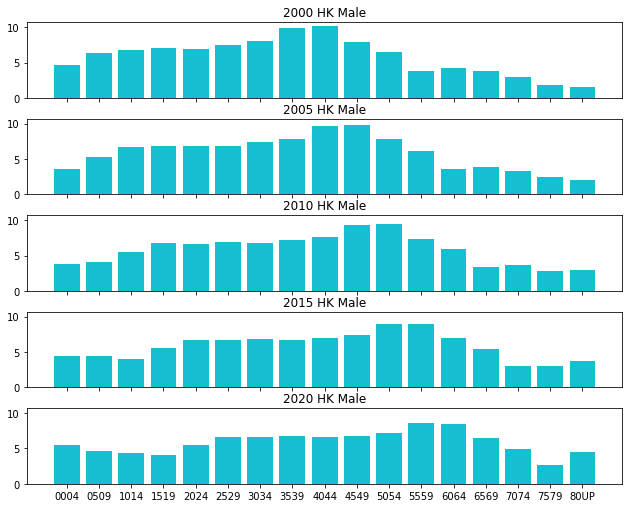

In [23]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, figsize=(9,7), sharex=True, sharey=True)
fig.tight_layout()

ax1.bar(M2000["Age"], M2000["value"], color="tab:cyan")
ax1.set_title("2000 HK Male")
ax2.bar(M2005["Age"], M2005["value"], color="tab:cyan")
ax2.set_title("2005 HK Male")
ax3.bar(M2010["Age"], M2010["value"], color="tab:cyan")
ax3.set_title("2010 HK Male")
ax4.bar(M2015["Age"], M2015["value"], color="tab:cyan")
ax4.set_title("2015 HK Male")
ax5.bar(M2020["Age"], M2020["value"], color="tab:cyan")
ax5.set_title("2020 HK Male");

# add semicolon at the end to hide the xtick msg (workaround) or plt.show()

In [24]:
# Female distribution between 2000-2020

F2020 = ageDf4Chart.loc[(ageDf4Chart["Gender"]=="F") & (ageDf4Chart["year"]==2020), ["Age","value"]]
F2015 = ageDf4Chart.loc[(ageDf4Chart["Gender"]=="F") & (ageDf4Chart["year"]==2015), ["Age","value"]]
F2010 = ageDf4Chart.loc[(ageDf4Chart["Gender"]=="F") & (ageDf4Chart["year"]==2010), ["Age","value"]]
F2005 = ageDf4Chart.loc[(ageDf4Chart["Gender"]=="F") & (ageDf4Chart["year"]==2005), ["Age","value"]]
F2000 = ageDf4Chart.loc[(ageDf4Chart["Gender"]=="F") & (ageDf4Chart["year"]==2000), ["Age","value"]]

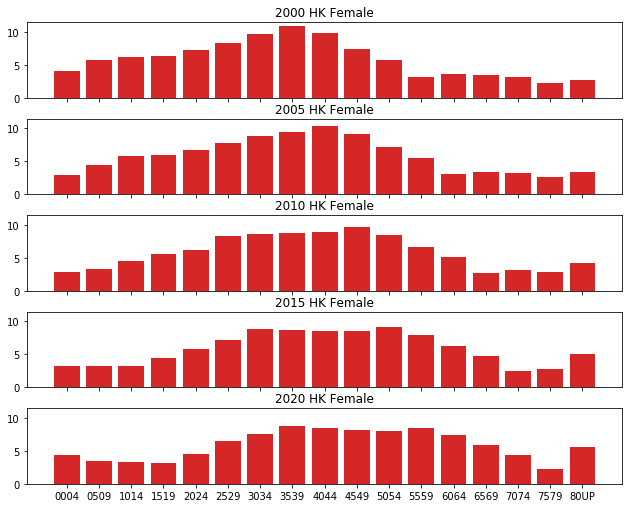

In [25]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, figsize=(9,7), sharex=True, sharey=True)
fig.tight_layout()

ax1.bar(F2000["Age"], F2000["value"], color="tab:red")
ax1.set_title("2000 HK Female")
ax2.bar(F2005["Age"], F2005["value"], color="tab:red")
ax2.set_title("2005 HK Female")
ax3.bar(F2010["Age"], F2010["value"], color="tab:red")
ax3.set_title("2010 HK Female")
ax4.bar(F2015["Age"], F2015["value"], color="tab:red")
ax4.set_title("2015 HK Female")
ax5.bar(F2020["Age"], F2020["value"], color="tab:red")
ax5.set_title("2020 HK Female")


### Conclusion:
1. Males live longer in recent year, 80up group increases from ~2 % to ~5% in last 20 years.
2. Females are generally long lived than males, ~5% are 80up in 2020, which is only slightly below the 25-29 group.
3. 2000 has a significant decrease in birth rate, we can see it in both male and female age distribution (15-19 in 2020).
4. In 2020, 15-19 age group is only around 3-4 % of total population. We can foresee that the labor force will be in shortage in 10 years later, because of the retirement of major labour group (55-64 in 2020) and lackage of youngs (18-29 in 2020) in 2030.

<font size = "4"> Q3) <ins> Which countries have the most severe population ageing issue?</ins></font>

In [26]:
# Q3)
# First, I will explore the 65+ age group between different countries in 2020
# Then, compare it with 2010 data, to figure out which countries have the most severe population ageing problem in last decade

sql = '''
    select country_name, year, sum(case when (Age="6569" or Age="7074" or Age="7579" or Age="80UP") and Gender="M" then value end) Male65UP, sum(case when (Age="6569" or Age="7074" or Age="7579" or Age="80UP") and Gender="F" then value end) Female65UP
from(
  select country_name, substring(table.indicator_code, 13, 1) Gender, substring(table.indicator_code, 8,4) Age, value, year
  from `bigquery-public-data.world_bank_health_population.series_summary` series
  inner join
    `bigquery-public-data.world_bank_health_population.health_nutrition_population` table 
  on 
    series.series_code = table.indicator_code
  where topic = "Population dynamics: Population by age group" and table.indicator_code LIKE "%5Y"
  order by country_name, year, Age
)
group by country_name, year
having year=2010 or year=2020
order by country_name, year

'''

age65up = sql_to_df(sql)
age65up

,country_name,year,Male65UP,Female65UP
0,Afghanistan,2010,2.156275,2.508261
1,Afghanistan,2020,2.394677,2.917205
2,Africa Eastern and Southern,2010,2.588791,3.364452
3,Africa Eastern and Southern,2020,2.757766,3.596258
4,Africa Western and Central,2010,2.548743,3.039935
...,...,...,...,...
470,"Yemen, Rep.",2020,2.639157,3.227238
471,Zambia,2010,1.614852,2.538652
472,Zambia,2020,1.685256,2.570265
473,Zimbabwe,2010,2.227037,3.840658


In [27]:
age65up["M_old"]=age65up.groupby(["country_name"])["Male65UP"].shift(1)
age65up["F_old"]=age65up.groupby(["country_name"])["Female65UP"].shift(1)
age65up["Male_Percentage_Change"] = (age65up["Male65UP"] - age65up["M_old"]) / age65up["M_old"]
age65up["Female_Percentage_Change"] = (age65up["Female65UP"] - age65up["F_old"]) / age65up["F_old"]

age65up["Male_Percentage_Change"] = pd.to_numeric(age65up["Male_Percentage_Change"], errors='ignore')
age65up["Female_Percentage_Change"] = pd.to_numeric(age65up["Female_Percentage_Change"], errors='ignore')

In [28]:
age65up.head(10)

,country_name,year,Male65UP,Female65UP,M_old,F_old,Male_Percentage_Change,Female_Percentage_Change
0,Afghanistan,2010,2.156275,2.508261,NaN,NaN,NaN,NaN
1,Afghanistan,2020,2.394677,2.917205,2.156275,2.508261,0.110562,0.163039
2,Africa Eastern and Southern,2010,2.588791,3.364452,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,2020,2.757766,3.596258,2.588791,3.364452,0.065272,0.068899
4,Africa Western and Central,2010,2.548743,3.039935,NaN,NaN,NaN,NaN
5,Africa Western and Central,2020,2.540020,3.036345,2.548743,3.039935,-0.003422,-0.001181
6,Albania,2010,10.312524,10.983478,NaN,NaN,NaN,NaN
7,Albania,2020,13.844273,15.596361,10.312524,10.983478,0.342472,0.419984
8,Algeria,2010,5.165995,5.752025,NaN,NaN,NaN,NaN
9,Algeria,2020,6.557509,6.932224,5.165995,5.752025,0.269360,0.205180


<br>
Let's explore the countires with percentage change for 65+ group and most 65+ group in 2020

In [29]:
# Male 65+ with highest percentage change between 2010 and 2020
age65up.sort_values(["Male_Percentage_Change"], ascending=False).head(5)

,country_name,year,Male65UP,Female65UP,M_old,F_old,Male_Percentage_Change,Female_Percentage_Change
356,Qatar,2020,1.612602,1.920313,0.489259,1.446778,2.296007,0.327303
378,Singapore,2020,12.283783,14.524373,6.090296,8.534264,1.016944,0.701889
446,United Arab Emirates,2020,1.215342,1.374109,0.621986,0.874592,0.953970,0.571143
262,"Macao SAR, China",2020,11.934316,12.006215,6.220120,7.333900,0.918663,0.637085
278,Mauritius,2020,10.976924,14.022943,6.439608,8.794916,0.704595,0.594437


In [30]:
# Female 65+ with highest percentage change between 2010 and 2020
age65up.sort_values(["Female_Percentage_Change"], ascending=False).head(5)

,country_name,year,Male65UP,Female65UP,M_old,F_old,Male_Percentage_Change,Female_Percentage_Change
378,Singapore,2020,12.283783,14.524373,6.090296,8.534264,1.016944,0.701889
55,Brunei Darussalam,2020,5.240829,5.926003,3.215939,3.575021,0.629642,0.657614
262,"Macao SAR, China",2020,11.934316,12.006215,6.220120,7.333900,0.918663,0.637085
354,Puerto Rico,2020,18.115584,23.269174,11.678120,14.438245,0.551241,0.611635
278,Mauritius,2020,10.976924,14.022943,6.439608,8.794916,0.704595,0.594437


In [31]:
# Male 65+ with highest percentage in 2020
age65up[(age65up["year"]==2020)].sort_values(["Male65UP"], ascending=False).head(5)

,country_name,year,Male65UP,Female65UP,M_old,F_old,Male_Percentage_Change,Female_Percentage_Change
212,Japan,2020,25.363297,31.292010,19.566752,25.304697,0.296245,0.236609
208,Italy,2020,20.858358,25.620486,17.812672,22.877423,0.170984,0.119903
348,Portugal,2020,20.205952,25.076512,16.317023,20.815615,0.238336,0.204697
148,Finland,2020,20.160364,24.883987,14.558064,19.804147,0.384825,0.256504
166,Greece,2020,20.104222,24.385885,17.319563,20.921065,0.160781,0.165614


In [32]:
# Female 65+ with highest percentage in 2020
age65up[(age65up["year"]==2020)].sort_values(["Female65UP"], ascending=False).head(5)

,country_name,year,Male65UP,Female65UP,M_old,F_old,Male_Percentage_Change,Female_Percentage_Change
212,Japan,2020,25.363297,31.292010,19.566752,25.304697,0.296245,0.236609
240,Latvia,2020,14.847309,25.679981,12.849995,22.679633,0.155433,0.132293
208,Italy,2020,20.858358,25.620486,17.812672,22.877423,0.170984,0.119903
252,Lithuania,2020,15.074679,25.394378,12.430092,21.400866,0.212757,0.186605
130,Estonia,2020,14.914489,25.287537,12.461716,21.936306,0.196825,0.152771


In [33]:
# HK 65+

# keep throwing SettingWithCopyWarning error, disable warning to get rid of it
import warnings
warnings.filterwarnings('ignore')

age65up2020 = age65up[(age65up["year"]==2020)]
age65up2020["m_rank"] = age65up2020["Male65UP"].rank(method="max", ascending=False)
age65up2020["f_rank"] = age65up2020["Female65UP"].rank(method="max", ascending=False)
age65up2020["m_change_rank"] = age65up2020["Male_Percentage_Change"].rank(method="max", ascending=False)
age65up2020["f_change_rank"] = age65up2020["Female_Percentage_Change"].rank(method="max", ascending=False)

age65up2020[(age65up2020["country_name"]=="Hong Kong SAR, China")]

,country_name,year,Male65UP,Female65UP,M_old,F_old,Male_Percentage_Change,Female_Percentage_Change,m_rank,f_rank,m_change_rank,f_change_rank
188,"Hong Kong SAR, China",2020,18.462723,17.971411,12.826417,13.054404,0.43943,0.376655,14.0,50.0,19.0,27.0


### Conclusion:
1. Japan has almost 1/3 Female and 1/4 Male are 65+ in 2020, and the both genders increase 20+ % in last decade
2. Qatar and Singapore have doubled 65+ male group, the ageing issue is especially severe for Singapore, which has 12% male population are 65+ in 2020
3. Hong Kong is one of the top rank countries suffering population ageing issue, e.g. male 65+ in 2020 is ranked top 14 among 237 recorded countries
 
In short, Japan has largest proportion of 65+ elders and it has increased 23-29% last decade; Singapore has highest percentage change for 65+ elders in last decade, i.e. 100% for male and 70% for female <br>
Hong Kong's population ageing issue is also severe compared to others, based on the retirement of major labour force and lack of youngs in 2030, we can foresee the ageing issue will be worst in 2030